In [89]:
import numpy as np

import matplotlib.pylab as plt

# 信号检测理论 Signal Detection Theory

### 用于SDT的工具函数

In [109]:
# 输入若干一维样本，返回其概率密度函数
def get_pdf(X,Bins):
    Idx = np.digitize(X,Bins)-1 # X中的每个样本属于哪个bin
    # 对于Bins[i-1]<x<=Bins[i]返回i，因此需要-1

    Idx,Count = np.unique(Idx,return_counts=True) # 每个Bin有多少个成员
    Pdf = np.zeros_like(Bins)
    
    Pdf[Idx] = Count
    Pdf     /= Pdf.sum()
    return Pdf

# 返回误报率和命中率，以用于绘制ROC曲线
def SDT_2AFC(P_pos,P_neg,X,Z):
    # 输入两个等长的一维向量作为概率分布，X是其对应的横轴，Z是手动指定的阈值
    assert isinstance(P_pos,np.ndarray) and isinstance(P_neg,np.ndarray)
    assert P_pos.shape==P_neg.shape==X.shape
    assert P_pos.sum()==1 and P_neg.sum()==1 # 保证可以作为概率分布
    assert np.all(X[:-1]<X[1:]) # 横轴严格单调
    if(type(Z)==int or type(Z)==list):
        Z = np.array(Z)
    assert isinstance(Z,np.ndarray) and Z.ndim<=1     
    

    if(Z.ndim==0):
        # Z为标量：返回对应的alpha和beta

        Idx_bins = X>=Z
        # 误报率
        alpha = P_neg[Idx_bins].sum()
        # 命中率
        beta  = P_pos[Idx_bins].sum()
        return alpha,beta
    else:
        # Z为向量：用于生成ROC曲线
        ALPHA = []
        BETA  = []
        for z in Z:
            Idx_bins = X>=z
            # 误报率
            alpha = P_neg[Idx_bins].sum()
            ALPHA.append(alpha)
            # 命中率
            beta  = P_pos[Idx_bins].sum()
            BETA.append(beta)
        ALPHA = np.array(ALPHA)
        BETA  = np.array(BETA)
        # 计算 Area Under Curve
        # 使用两个beta的均值作为微元的高度，使用两个alpha的差分作为微元的宽度
        dS  = (ALPHA[:-1]-ALPHA[1:]) * (BETA[:-1]+BETA[1:])/2
        auc = dS.sum()
        return ALPHA,BETA,auc
    

### 实验

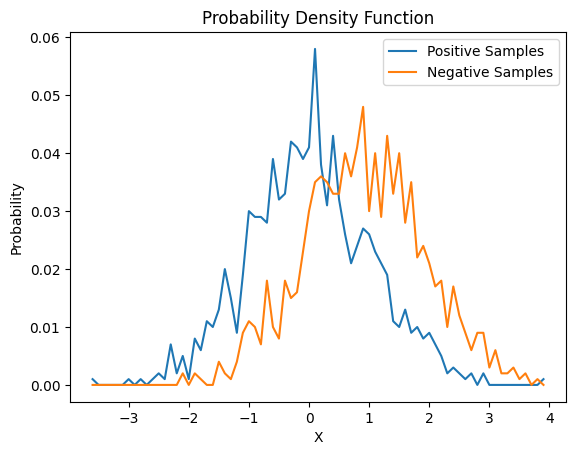

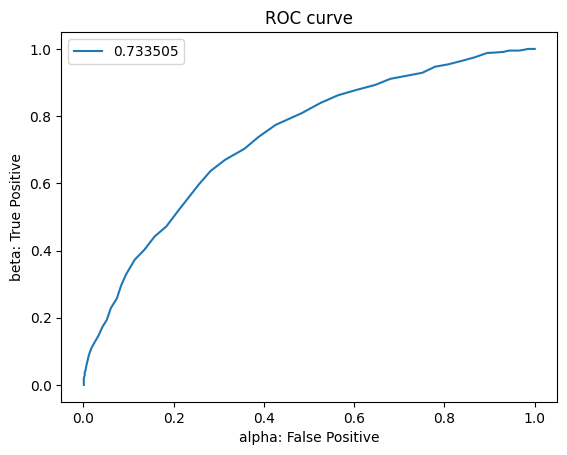

In [144]:


A = np.random.randn(1000)
B = np.random.randn(1000)+1
step = 0.1
min  = np.min([A,B])
max  = np.max([A,B])
min -= min % step
max -= max % step
Bins = np.arange(min,max,step)
PA = get_pdf(A,Bins)
PB = get_pdf(B,Bins)

plt.title("Probability Density Function")
plt.plot(Bins,PA,label="Positive Samples")
plt.plot(Bins,PB,label="Negative Samples")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.show()

plt.title("ROC curve")
ALPHA,BETA,AUC = SDT_2AFC(PB,PA,Bins,Bins)
plt.plot(ALPHA,BETA,label=AUC)
plt.xlabel("alpha: False Positive")
plt.ylabel("beta: True Positive")
plt.legend()
plt.show()

